![title](imagens/logo_flisol_demo03_Teste.png)

# Objetivo da Demo

Faremos Scraping (raspagem) no site de vagas **INDEED** para buscar vagas com o termo ***Data Science*** e localidade igual a ***Brazil***, fazendo todo tratamento necessário nos dados vindos do site e alguns Analytics.


Será usado o Chromedriver para o processo de extração. 
** Este processo simula um RPA!!! **

https://sites.google.com/a/chromium.org/chromedriver/home

## Carregando os Pacotes "Padrão" Necessários

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt


%matplotlib inline

## Carregando os Pacotes SELENIUM, WEBDRIVER-MANAGER, BEATIFULSOAP

In [4]:
# Precisaremos do selenium
#!pip install -q selenium
#!pip3 install webdriver-manager

In [2]:
import selenium # <=== Importante
from selenium import webdriver # <=== Importante
from selenium.webdriver.support.ui import WebDriverWait # <=== Importante
from selenium.webdriver.common.by import By # <=== Importante
from selenium.webdriver.support import expected_conditions as EC # <=== Importante
from selenium.webdriver.chrome.service import Service

from webdriver_manager.chrome import ChromeDriverManager

import bs4
from bs4 import BeautifulSoup
from collections import Counter


In [4]:
#driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
#driver.get("https://www.google.com")

## Carregando o Pacote NLTK (Processamento de Linguagem Natural)

In [3]:
import nltk

In [7]:
# Temos que fazer o download do dicionário e demais pacotes do NLTK
# Vai abrir outra janela do navegador solicitando a seleção dos itens para download. 
# Selecione todos os itens com o mouse e então clique em Download. Feche a janela quando terminar.
# nltk.download()

## Carregando Do Pacote NLTK a função WORD_TOKENIZE
### Este pacote faz o processo de TOKENIZAÇÃO, que é quebra de uma sentença em palavras, por exemplo. Essa tarefa faz parte do processamento de linguagem natural. 

In [4]:
from nltk import word_tokenize

## Carregando Do Pacote NLTK a função STOPWORDS
### Este pacote faz o reconhecimento e retirada de ***stopwords*** dentro do texto.
### ***stopwords***  são palavras comuns, como artigos, advérbios ou conjunções. Essa tarefa faz parte do processamento de linguagem natural. 

In [5]:
# As stopwords são palavras comuns, como artigos, advérbios ou conjunções.
# As stopwords devem ser removidas no processamento de linguagem natural.
# Vamos importar a função stopwords.
from nltk.corpus import stopwords

## Web Scraping

In [6]:
# Cria o driver de conexão. Será aberta outra janela do navegador. Não feche-a e mantenha aberta durante a extração.
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

In [7]:
# Cria o dataframe para receber os dados
dados = pd.DataFrame(columns = ["Titulo", "Localidade", "Empresa", "Salario", "Mini_Desc"])

A url abaixo foi gerada da seguinte forma:
    
- 1- Acesso ao site https://www.indeed.com.br

- 2- Seleção dos filtros de pesquisa de vagas com o termo "Data Science" e localidade "Brasil"

- 3- Então copiamos a url na barra de endereço do navegador.

**Evite executar a célula abaixo muitas vezes seguidas ou seu acesso pode ser bloqueado pelo site.**

In [13]:
# Abre a conexão com o site e faz a pesquisa
#driver.get("https://www.indeed.com.br/jobs?q=data+science&l=brasil")
#driver.implicitly_wait(15)

In [8]:
lstPaginas = [0,10,20,30,40,50,60,70,80,90,100]
#lstPaginas = [0,10]

for i in lstPaginas:

    driver.get("https://www.indeed.com.br/jobs?q=data+science&l=brasil&start="+ str(i))

    driver.implicitly_wait(15)

    resultado = driver.find_elements(By.CLASS_NAME,'result')
    
    for vaga in resultado:
    
        # Primeiro coletamos o elemento HTML interno
        result_html = vaga.get_attribute('innerHTML')
        
        # Fazemos então o parser do código HTML
        soup = BeautifulSoup(result_html, 'html.parser')
        
        # Buscamos as tags para análise. 
        # Usaremos blocos try/except para evitar erros na execução, no caso de ua informação não estar disponível na vaga
        
        # Título da vaga
        try:
            #title = soup.find("a", class_ = "jobtitle").text.replace('\n', '')
            title = soup.find("a", class_ = "jcs-JobTitle css-jspxzf eu4oa1w0").text.replace('\n', '')
        except:
            title = np.NaN
        
        # Localidade
        try:
            location = soup.find(class_ = "companyLocation").text
        except:
            location = np.NaN
        
        # Empresa
        try:
            company = soup.find(class_ = "companyName").text.replace('\n', '').strip()
        except:
            company = np.NaN
        
        # Salário
        try:
            #salary = soup.find("a", class_ = "metadata salary-snippet-container").text.replace('\n', '').strip()
            salary = soup.find("div", class_ = "metadata salary-snippet-container").text.replace('\n', '').strip()
        except:
            salary = np.NaN
        
        # Tipo de pesquisa (orgânica ou patrocinada)
        try:
            job_snippet = soup.find("div", class_ = "job-snippet").text
            #sponsored = "Sponsored"
        except:
            job_snippet = np.NaN
        
        
        #div_job_seen_beacon = soup.find_elements(By.CLASS_NAME,'job_seen_beacon')
        #div_job_seen_beacon = soup.find("div", class_ = 'job_seen_beacon')
        #div_job_seen_beacon.click()

        # jobsearch-jobDescriptionText
        # print('Vaga............: '+ title)
        # print('Local...........: '+ location)
        # print('Empresa.........: '+ company)
        # print('Remuneração.....: '+ str(salary))
        # print('Breve Descritivo: '+ job_snippet)
        
        # Gravamos o resultado em nosso dataframe
        nova_vaga = pd.Series({"Titulo":title, 
                           "Localidade":location, 
                           "Empresa":company, 
                           "Salario":salary, 
                           "Mini_Desc":job_snippet})       
        dados = pd.concat([dados,nova_vaga.to_frame().T],ignore_index=True)

        # dados = dados.append({"Titulo":title, 
        #                    "Localidade":location, 
        #                    "Empresa":company, 
        #                    "Salario":salary, 
        #                    "Mini_Desc":job_snippet}, 
        #                  ignore_index = True)
        # dados.loc[len(dados.index)] = [title,location,company,salary,job_snippet] 

In [9]:
driver.close()

In [22]:

# Shape
dados.shape

(165, 5)

In [23]:
# Visualizamos os dados
dados.head()

,Titulo,Localidade,Empresa,Salario,Mini_Desc
0,Business & Data Science Analyst - REMOTE WORK,"Home office in Sorocaba, SP+2 locais",BairesDev,NaN,\nIn-depth knowledge of data modeling techniqu...
1,Pessoa Estagiária em Data Science - Projetos &...,Home office,Talentos Horus,NaN,"\nE, para nós, a Ética é inegociável para o no..."
2,Data Science,Home office,Escale,NaN,\nAtividades que farão parte da sua Escalada.\...
3,Pessoa Estagiária em Data Science e Analytics,Home office,Talentos Horus,NaN,"\nE, para nós, a Ética é inegociável para o no..."
4,BRA Data & Analytics Analyst +,"São Paulo, SP",Santander,NaN,\nDefinir o plano estratégico de dados no toca...


In [24]:
dados[dados['Localidade'] == 'Home office'].count()[2]


38

In [25]:
dados[dados['Localidade'] == 'São Paulo, SP'].count()[2]

30

Legal. Temos dados para trabalhar! Vamos salvar em disco para não perder os dados ao fechar o Jupyter Notebook.

In [29]:
# Salvamos os dados em disco
dados.to_csv('dados.csv', encoding = "utf-8", index = False)

## Análise de Dados

In [30]:
# Carregamos o dataset
df = pd.read_csv("dados.csv", encoding = "utf-8")

In [31]:
# Shape
df.shape

(165, 5)

In [32]:
# Visualiza os dados
df.head()

,Titulo,Localidade,Empresa,Salario,Mini_Desc
0,Business & Data Science Analyst - REMOTE WORK,"Home office in Sorocaba, SP+2 locais",BairesDev,NaN,\nIn-depth knowledge of data modeling techniqu...
1,Pessoa Estagiária em Data Science - Projetos &...,Home office,Talentos Horus,NaN,"\nE, para nós, a Ética é inegociável para o no..."
2,Data Science,Home office,Escale,NaN,\nAtividades que farão parte da sua Escalada.\...
3,Pessoa Estagiária em Data Science e Analytics,Home office,Talentos Horus,NaN,"\nE, para nós, a Ética é inegociável para o no..."
4,BRA Data & Analytics Analyst +,"São Paulo, SP",Santander,NaN,\nDefinir o plano estratégico de dados no toca...


### Tarefa 1: Qual o tipo de vaga mostrado na pesquisa, orgânica ou patrocinada?

In [ ]:
# Vamos contar o total de registros por valor da coluna "Tipo_Pesquisa"
# df["Tipo_Pesquisa"].value_counts()

Todas as vagas foram orgânicas.

### Tarefa 2: Quais empresas tem o maior número de vagas listadas?

In [33]:
# Agrupa o dataset por empresa
grupo1 = df.groupby("Empresa").count()["Titulo"].sort_values(ascending = False)[:20]

In [34]:
# Visualiza os dados
grupo1.head()

Empresa
Stefanini              11
Visagio                 4
Samsung Electronics     3
Itaú Unibanco           2
OEmprego                2
Name: Titulo, dtype: int64

<AxesSubplot:xlabel='Empresa'>

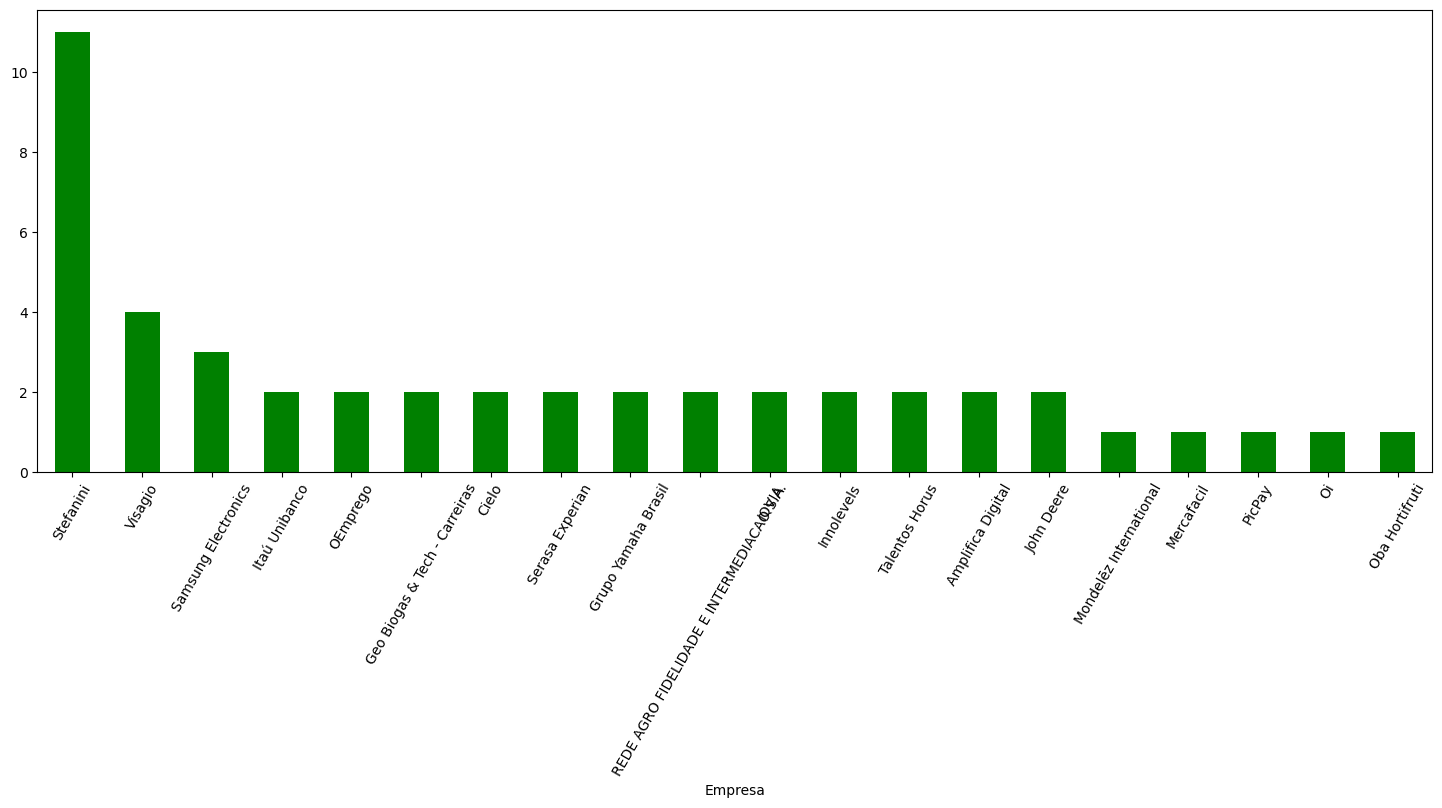

In [35]:
# Gráfico
grupo1.plot(kind = "bar", figsize = (18,6), color = "green", rot = 60)

### Tarefa 3: Qual localidade tem o maior número de vagas listadas?

In [36]:
# Busca localidade com mais vagas
grupo2 = df.groupby("Localidade").count()["Titulo"].sort_values(ascending = False)[:20]

In [37]:
# Visualiza os dados
grupo2.head()

Localidade
Home office                     38
São Paulo, SP                   30
Home office in São Paulo, SP    18
Jaguariúna, SP                  11
Curitiba, PR                     6
Name: Titulo, dtype: int64

<AxesSubplot:xlabel='Localidade'>

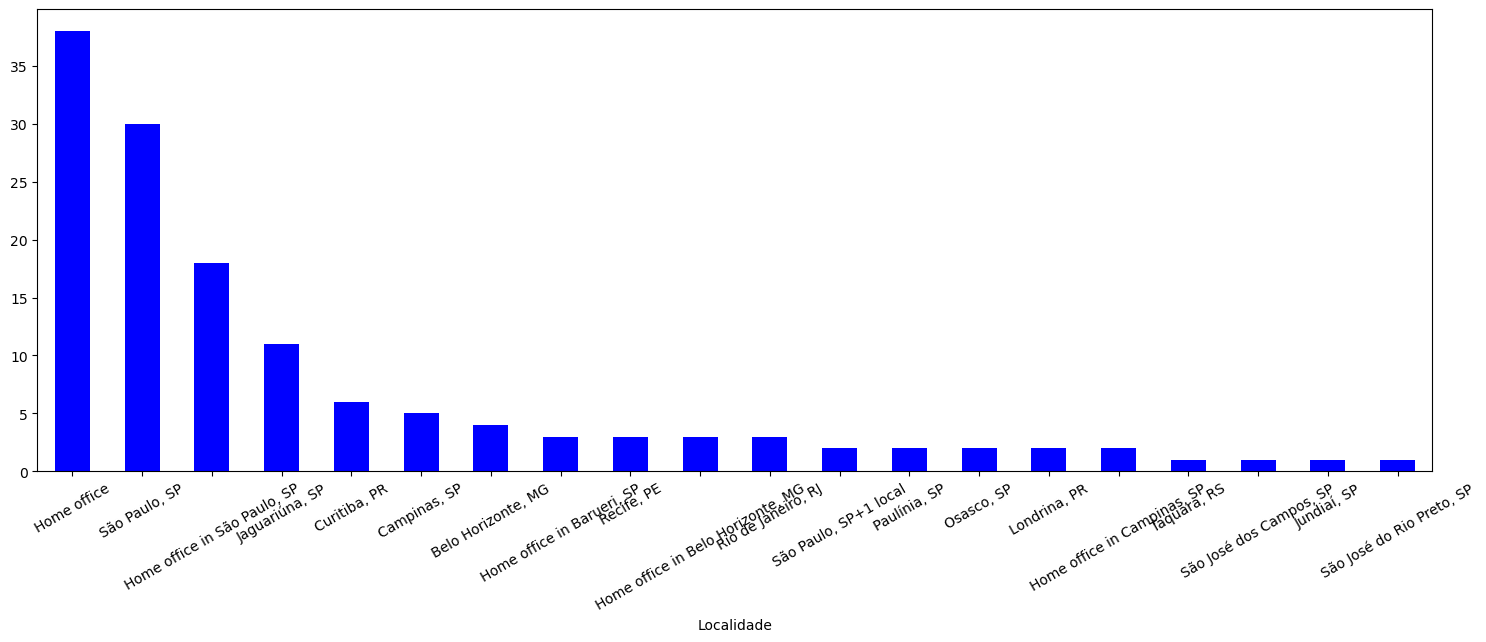

In [38]:
# Gráfico
grupo2.plot(kind = "bar", figsize = (18,6), color = "blue", rot = 30)

### Tarefa 4: Quais os skills mais comuns nas descrições das vagas?

Agora aplicamos Processamento de Linguagem Natural para extrair alguns insights das descrições das vagas.

In [ ]:
# Vamos definir a lista de stopwords em português
stop_words_pt = stopwords.words('portuguese')

In [ ]:
# Vamos definir a lista de stopwords em inglês
stop_words_en = stopwords.words('english')

In [39]:
# Função de limpeza dos dados
def limpa_dados(desc):
    desc = word_tokenize(desc)
    desc = [word.lower() for word in desc if word.isalpha() and len(word) > 2]
    desc = [word for word in desc if word not in stop_words_pt]
    desc = [word for word in desc if word not in stop_words_en]
    return desc

In [43]:
# Aplicamos a função de limpeza a coluna de descrição da vaga
desc_vagas = df["Mini_Desc"].apply(limpa_dados)

In [44]:
# Visualiza os dados
desc_vagas.head()

0    [knowledge, data, modeling, techniques, genera...
1    [ética, inegociável, crescimento, sustentável,...
2    [atividades, farão, parte, escalada, vivência,...
3    [ética, inegociável, crescimento, sustentável,...
4    [definir, plano, estratégico, dados, tocante, ...
Name: Mini_Desc, dtype: object

In [45]:
# Vamos sumarizar as descrições das vagas
desc_itens = desc_vagas.apply(Counter).sum().items()

In [46]:
# Ordenamos o resultado
desc_itens = sorted(desc_itens, key = lambda kv: kv[1], reverse = True)

In [47]:
# Criamos uma série
desc_itens_serie = pd.Series({k: v for k, v in desc_itens})

In [48]:
# Visualizamos os dados, com a contagem de palavras mais frequentes nas descrições das vagas
desc_itens_serie.head(15)

data            83
dados           59
experiência     48
sql             25
analytics       23
science         22
excel           19
conhecimento    19
tecnologia      17
atividades      16
power           15
trabalhar       15
estatística     15
avançado        14
ciência         14
dtype: int64

In [49]:
# Vamos criar uma lista de skills e pesquisar como eles aparecem nas descrições das vagas
# Usamoas as palavras em minúsculo pois ao limpar os dados convertemos tudo para minúsculo
skills = ["python", "statistics", "analytics", "business", "projects", "develop"]

In [50]:
# Filtramos a série com os skills
filtro_skills = desc_itens_serie.filter(items = skills)

<AxesSubplot:>

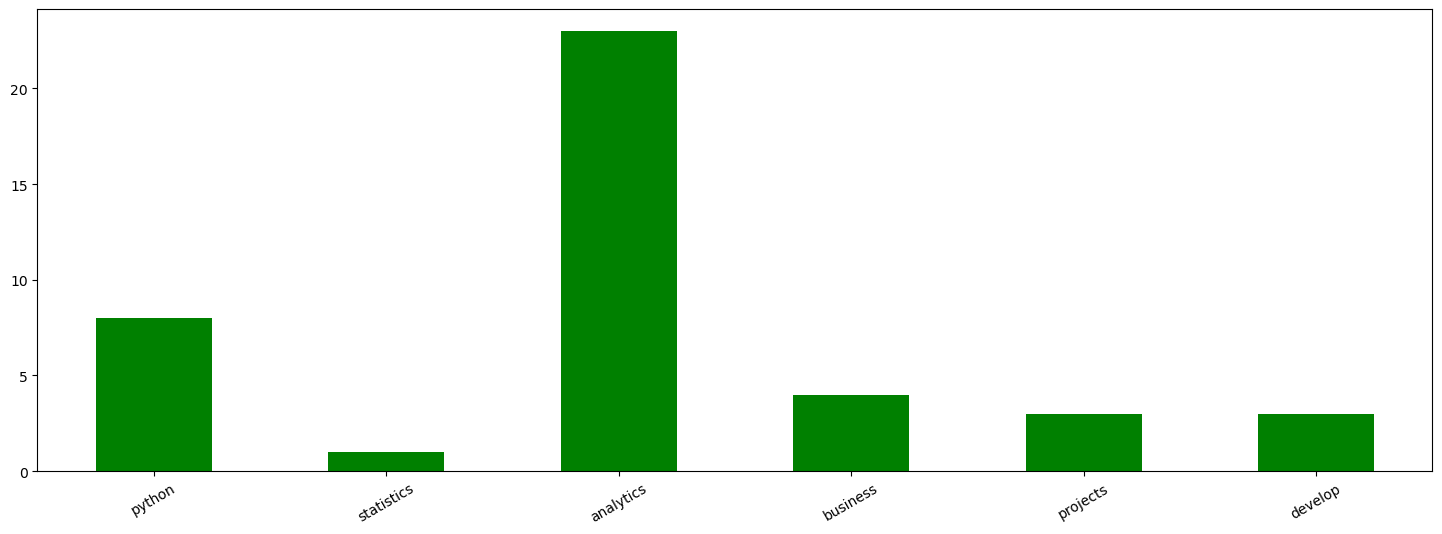

In [54]:
# Criamos o plot
filtro_skills.plot(kind = 'bar', figsize = (18,6), color = "green", rot = 30)

# Possíveis ***INSIGHTS*** vindos da Brevíssima Análise do Dados

### 1.) A palavra **ANALYTICS** => ***aparece com frequência em quase todas as vagas e bem mais alta que a segunda maior*** que é **PYTHON**! Por que será?
### 2.) A palavra **PYTHON** => ainda ***aparece com frequência*** nas vagas! O que leva a isto?
### 3.) A palavra **STATISTICS** => ***aparece com menos frequência*** nas vagas! O que aconteceu? No passado era umas das mais procuradas!
### 4.) O trio de palavras **ANALYTICS, PYTHON e BUSINESS"** => ***aparentam ser as 3 habilidades mais procuradas*** para vaga de Ciência de Dados! 

## Será que uma empresa de recolocação ou setor de RH não gostaria deste tipo de informação?


#### Execução feia em 07/04/2023 às 16h30min